# Prediction on Survival Rate and Aircraft Damage of Aviation Accidents
## MA0218 Mini Project
### AY2022/23 MA9 Group 5

### Essential Library
Let's import the necessary library

In [100]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set                                  # this is to set the default Seaborn style for graphics

<function seaborn.rcmod.set(*args, **kwargs)>

### A glace at dataset
We import the dataset which is in csv format with `read_csv` from the pandas library.

In [101]:
avi_accident = pd.read_csv("AviationData.csv")
avi_accident

C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\798029508.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  avi_accident = pd.read_csv("AviationData.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/7/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/9/1996
2,20061025X01555,Accident,NYC07LA005,30/8/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/2/2007
3,20001218X45448,Accident,LAX96LA321,19/6/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,2/8/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/4/1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,2.02112E+13,Accident,GAA22WA054,21/12/2021,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,2.02112E+13,Accident,WPR22LA069,22/12/2021,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,2.02112E+13,Accident,CEN22FA082,26/12/2021,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87280,2.02112E+13,Accident,ERA22LA097,29/12/2021,"Marathon, FL",United States,NaN,NaN,NaN,NaN,...,NaN,ExecAir,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN


Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

> **Event.Id** : Unique Identification for Each Event.\
> **Investigation.Type** : Type of Event. \
> **Accident.Number** : NTSB Number. \
> **Event.Date** : The date of the event. Dates are be entered in the format: MM/DD/YYYY \
> **Location** : The city or place location closest to the site of the event. \
> **Country** :	The country in which the event took place.\
> **Latitude** : Event Location Latitude. \
> **Longitude** : Event Location Longitude. \
> **Airport.Code** : Airport code if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport. \
> **Airport.Name** : Airport name if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport. \
> **Injury.Severity** : Indicate the highest level of injury among all injuries sustained as a result of the event. \
> **Aircraft.damage** : Indicate the severity of damage to the accident aircraft. For the purposes of this variable, aircraft damage categories are defined in 49 CFR 830.2.\
> **Aircraft.Category** :The category of the involved aircraft. In this case, the definition of aircraft category is the same as that used with respect to the certification, ratings, privileges, and limitations of airmen. Also note that there is some overlap of category and class in the available choices.\
> **Registration.Number** : ll registration (tail) number of the involved aircraft, including the International Civil Aviation Organization (ICAO) country prefix. Note: the prefix for US registered aircraft is "N." \
> **Make** : Name of the manufacturer of the involved aircraft. \
> **Model** : Aircraft Model. \
> **Amateur.Built** : Aircraft is a homebuilt (Y/N). \
> **Number.of.Engines** : The total number of engines on the accident aircraft. \
> **Engine.Type** :	Type of engine(s) on the involved aircraft. \
> **FAR.Description** :	The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident. \
> **Schedule** : Indicates whether an air carrier operation was scheduled or not. \
> **Purpose.of.flight** :Type of Flying (Per_Bus / Primary). \
> **Air.carrier** : Operator Name & Operator Is Doing Business As. \
> **Total.Fatal.Injuries** : Injury Total Fatal. \
> **Total.Serious.Injuries** : Injury Total Serious. \
> **Total.Minor.Injuries** : Injury Total Minor. \
> **Total.Uninjured** : Non-Injury Total. \
> **Weather.Condition** : Basic weather conditions. \
> **Broad.phase.of.flight** : All occurrences include information about the phase of flight in which the occurrence took place. Phase of flight refers to the point in the aircraft operation profile in which the event occurred. \
> **Report.Status** : The furthest level to which a report has been completed.\
> **Publication.Date** : The date on which the previous column was published to the web. \

Let's have an overview of the dataset, i.e. the `type` and `shape` of the data.

In [102]:
print("Data type:\t", type(avi_accident))
print("Data dimension:\t", avi_accident.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dimension:	 (87282, 31)


Next, we will check the data type of each column by using `info`.

In [103]:
avi_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

## Data Preperation and Data Cleaning

We will now prepare and clean up our dataset.

First, we will use `describe` to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the dataset. 

Note that this will only represents the overview for the column of the **numerical data**.

In [104]:
avi_accident.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81533.000000,75881.000000,74772.000000,75349.000000,81370.000000
mean,1.147131,0.652772,0.280921,0.360814,5.311847
std,0.447085,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We will only extract the data which are useful for analysis, which then comprised of n out of 31 columns in total and have a look at the data type of each column with `info`.

In [105]:
avi_acc = avi_accident[["Accident.Number", "Investigation.Type", "Event.Date", "Location", 
                       "Country",  "Injury.Severity" , "Aircraft.damage", "Make", 
                      "Amateur.Built", "Number.of.Engines", "Engine.Type", "Purpose.of.flight",  
                      "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries",
                      "Total.Uninjured", "Weather.Condition","Broad.phase.of.flight" 
                      ]]
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Event.Date              87282 non-null  object 
 3   Location                87230 non-null  object 
 4   Country                 87056 non-null  object 
 5   Injury.Severity         86399 non-null  object 
 6   Aircraft.damage         84272 non-null  object 
 7   Make                    87219 non-null  object 
 8   Amateur.Built           87180 non-null  object 
 9   Number.of.Engines       81533 non-null  float64
 10  Engine.Type             81391 non-null  object 
 11  Purpose.of.flight       81493 non-null  object 
 12  Total.Fatal.Injuries    75881 non-null  float64
 13  Total.Serious.Injuries  74772 non-null  float64
 14  Total.Minor.Injuries    75349 non-null

As there are 87282 rows and there are 87282 unique Accident Number, we can then ensure that all the datapoints are unique and no duplicated data in this dataset.

In [106]:
print("Total number of rows in dataset:\t", len(avi_acc))
print("Total number of unique Event ID:\t", len(avi_acc["Accident.Number"].unique()))

Total number of rows in dataset:	 87282
Total number of unique Event ID:	 87282


Now, we will check for NULL inputs and deal with them accordingly. 

In [107]:
avi_acc.isnull().sum()

Accident.Number               0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5891
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

First, we want to clear the null values of `Total.Fatal.Injuries`, `Ttoal.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`. We wil first deal with the **numerical variables**, so let's know more about the measure of central tendancy. 

**NOTE:** We consider `Number.of.Engines` as discrete data which is typically represented as categorical data.  

### Measure of Central Tendancy

#### Impute with mean, median or mode value
- **Impute with mean:** If the data is symmetrically distributed, one can make use of mean for replacing missing value. 
- **Impute with median:** If the data is skewed (either positively or negatively) or if the data consists of outliers, one can make use of median.
- **Impute with mode:** If the data is skewed (either positively or negatively), one can make use of mean for replacing missing value. 

We will first start off by using `describe` function to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the numerical variable dataset.

In [108]:
avi_acc[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,75881.000000,74772.000000,75349.000000,81370.000000
mean,0.652772,0.280921,0.360814,5.311847
std,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


To have a clearer visualisation of the dataset distribution, we will use **Box Plot**, follow by **Histogram & KDE Plot**, lastly with **Violin PLot**.

We will first start with the **Box Plot** of `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`.

Text(0.5, 1.0, 'Total Uninjured')

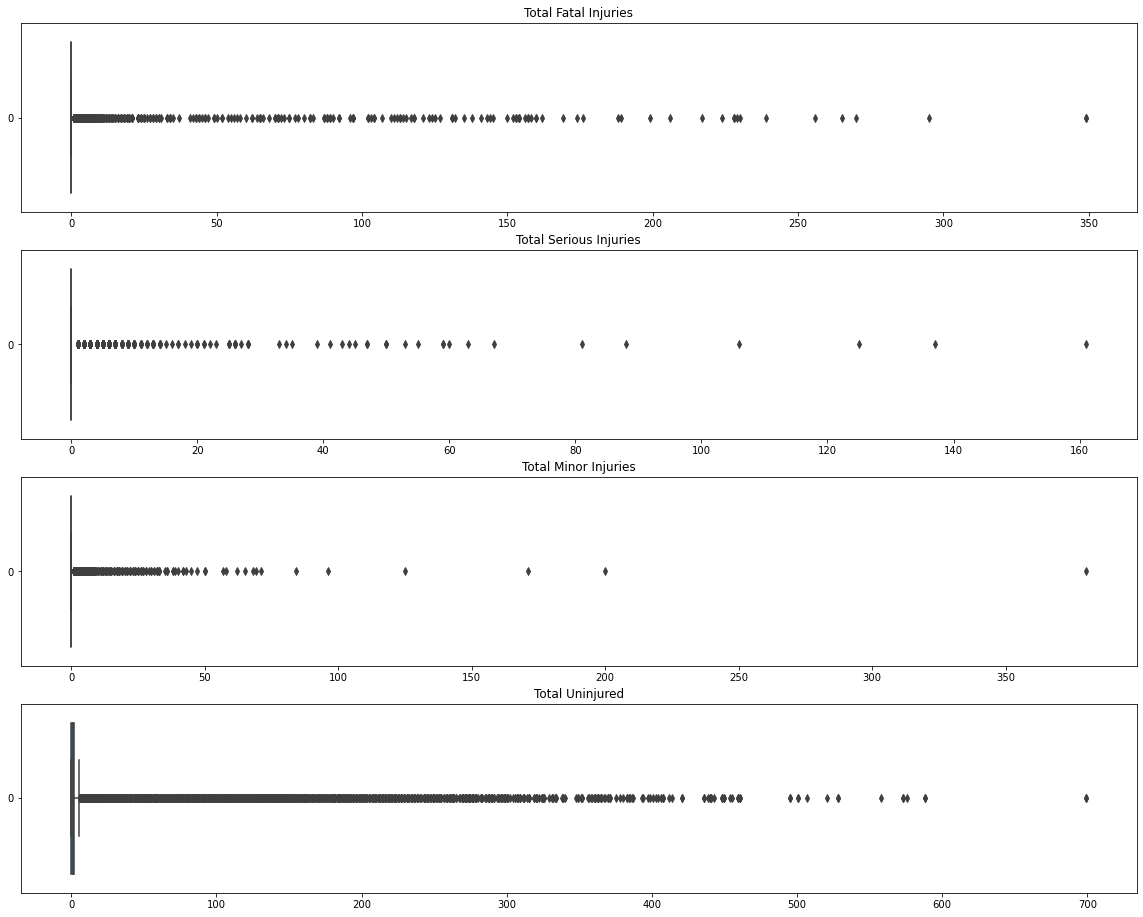

In [109]:
f, axes = plt.subplots(4,1, figsize = (20,16))

sb.boxplot(data = avi_acc["Total.Fatal.Injuries"], orient = "h", ax = axes[0]).set_title("Total Fatal Injuries")
sb.boxplot(data = avi_acc["Total.Serious.Injuries"], orient = "h", ax = axes[1]).set_title("Total Serious Injuries")
sb.boxplot(data = avi_acc["Total.Minor.Injuries"], orient = "h", ax = axes[2]).set_title("Total Minor Injuries")
sb.boxplot(data = avi_acc["Total.Uninjured"], orient = "h", ax = axes[3]).set_title("Total Uninjured")


#### Skewness

Skewness is a measure of symmetry, which in turn tells us more about the distribution of the data.
- If the skewness is between **-0.5** and **0.5**, the data is fairly symmetrical.
- If the skewness is between **-1** and **-0.5** or between **0.5** and 1, the data is moderately skewed.
- If the skewness is less than **-1** or greater than **1**, the data is highly skewed.

From the skewness of each variable given below, 

In [110]:
Numdata = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
for i in Numdata:
    print("SKewness", i, "\t:", avi_acc[i].skew())

SKewness Total.Fatal.Injuries 	: 32.89339797950946
SKewness Total.Serious.Injuries 	: 49.159571419457386
SKewness Total.Minor.Injuries 	: 86.53335193063873
SKewness Total.Uninjured 	: 9.141805758957995


Now, we will have a look at the **mean**, **median** and **mode** of each of the data. This will gives a summary of the centre point of the dataset.

In [111]:
for i in Numdata:
    print(i, "Mean:", round(avi_acc[i].mean(),2), "\t\tMedian:", avi_acc[i].median(), "\t\tMode:", avi_acc[i].mode(), "\n")

Total.Fatal.Injuries Mean: 0.65 		Median: 0.0 		Mode: 0    0.0
Name: Total.Fatal.Injuries, dtype: float64 

Total.Serious.Injuries Mean: 0.28 		Median: 0.0 		Mode: 0    0.0
Name: Total.Serious.Injuries, dtype: float64 

Total.Minor.Injuries Mean: 0.36 		Median: 0.0 		Mode: 0    0.0
Name: Total.Minor.Injuries, dtype: float64 

Total.Uninjured Mean: 5.31 		Median: 1.0 		Mode: 0    0.0
Name: Total.Uninjured, dtype: float64 



By looking at the skewness of the data, we can conclude that all `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`are positively skewed. 

Hence, we decided to use **median** to replace all the null values without changing the distribution of the data. This decision is supported by the fact that the values of median and mean are much similar as compared to mode for this highly skewed data.

In [112]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(missing_values = np.NaN, strategy = 'median')
avi_acc['Total.Fatal.Injuries']= imputer_median.fit_transform(avi_acc["Total.Fatal.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Serious.Injuries']= imputer_median.fit_transform(avi_acc["Total.Serious.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Minor.Injuries']= imputer_median.fit_transform(avi_acc["Total.Minor.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Uninjured']= imputer_median.fit_transform(avi_acc["Total.Uninjured"].values.reshape(-1,1))[:,0]

C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\1692601465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avi_acc['Total.Fatal.Injuries']= imputer_median.fit_transform(avi_acc["Total.Fatal.Injuries"].values.reshape(-1,1))[:,0]
C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\1692601465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avi_acc['Total.Serious.Injuries']= imputer_median.fit_transform(avi_acc["Total.Serious.Injuries"].values.reshape(-1,1))[:,0]
C:\Users\minxu\AppData\Local\Temp\ipyker

Now,we will count the number of null data form each column of the cleaned data. Notice that we still have null values in the categorical variables, i.e. `Location`, `Country`, `Injury.Severity`, `Aircraft.damage`, `Make`, `Amateur.Built`, `Number.of.Engines`, `Engine.Type`, `Purpose.of.flight`, `Weather.Condition` and `Broad.phase.of.flight`.

In [113]:
avi_acc.isnull().sum()

Accident.Number               0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5891
Purpose.of.flight          5789
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

Let's have a look at the distribution of the numerical variables after replacing with **median** by using a **boxplot** to visualise. Notice that the distribution remains the same.

Text(0.5, 1.0, 'Total Uninjured')

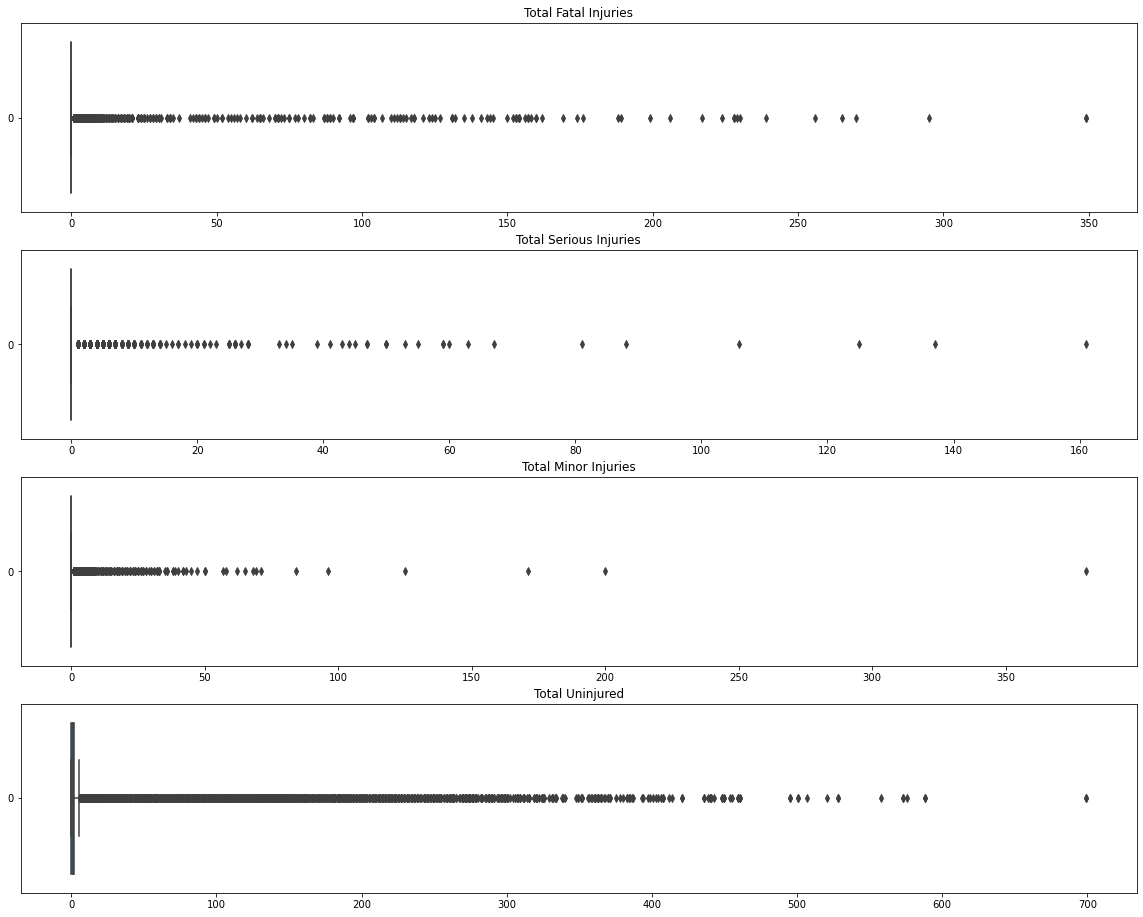

In [114]:
f, axes = plt.subplots(4,1, figsize = (20,16))

sb.boxplot(data = avi_acc["Total.Fatal.Injuries"], orient = "h", ax = axes[0]).set_title("Total Fatal Injuries")
sb.boxplot(data = avi_acc["Total.Serious.Injuries"], orient = "h", ax = axes[1]).set_title("Total Serious Injuries")
sb.boxplot(data = avi_acc["Total.Minor.Injuries"], orient = "h", ax = axes[2]).set_title("Total Minor Injuries")
sb.boxplot(data = avi_acc["Total.Uninjured"], orient = "h", ax = axes[3]).set_title("Total Uninjured")

Now, we will deal with the null values which are non-numerical by filling **NotDefined**.
As for `Weather.Condition`, we will replace the null values as **UNK**, which represents unknown in this column. 
As for `Broad.phase.of.flight`, we will replace the null value as **Unknown**. 

In [123]:
catdata = ["Location", "Country", "Injury.Severity" , "Aircraft.damage", "Make", "Amateur.Built", 
           "Number.of.Engines", "Engine.Type", "Purpose.of.flight"]
for j in catdata:
    avi_acc[j].fillna(value = "NotDefined", inplace = True)

avi_acc["Weather.Condition"].fillna(value = "UNK", inplace = True)
avi_acc["Broad.phase.of.flight"].fillna(value = "Unknown", inplace = True)

C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\4181660361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avi_acc[j].fillna(value = "NotDefined", inplace = True)
C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\4181660361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avi_acc["Weather.Condition"].fillna(value = "UNK", inplace = True)
C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\4181660361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Now, our data should not consists of any **NULL DATA** anymore.

In [124]:
avi_acc.isnull().sum()

Accident.Number           0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

Before proceding to the **Exploratory Data Analysis & Visualisation**, we will change the data types of each column.

In [117]:
def convert_category(data, *args):
    for k in args:
        data[k] = data[k].astype("category")

def convert_float32(data, *args):
    for k in args:
        data[k] = data[k].astype("float32")

def convert_datetime64(data, *args):
    for k in args:
        data[k] = data[k].astype("datetime64")

In [118]:
convert_category(avi_acc, ["Accident.Number", "Investigation.Type", "Location", "Country", "Injury.Severity", 
                         "Aircraft.damage",  "Make", "Amateur.Built","Number.of.Engines", "Engine.Type", "Purpose.of.flight", 
                        "Weather.Condition", "Broad.phase.of.flight"])
convert_float32(avi_acc, ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"])
convert_datetime64(avi_acc, "Event.Date")

C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\4089763451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k] = data[k].astype("category")
C:\Users\minxu\AppData\Local\Temp\ipykernel_14888\4089763451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k] = data[k].astype("float32")
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '24/10/1948' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/10/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/10/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/10/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/10/1997' in DD/MM/YYYY format. Provide format or specif

C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\minxu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/10/2012' in DD/MM/YYYY format. Provide format or specif

Notice that the data type for each column wil be changed by now. We will check the data type of each column using `info` function.

In [119]:
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Accident.Number         87282 non-null  category      
 1   Investigation.Type      87282 non-null  category      
 2   Event.Date              87282 non-null  datetime64[ns]
 3   Location                87282 non-null  category      
 4   Country                 87282 non-null  category      
 5   Injury.Severity         87282 non-null  category      
 6   Aircraft.damage         87282 non-null  category      
 7   Make                    87282 non-null  category      
 8   Amateur.Built           87282 non-null  category      
 9   Number.of.Engines       87282 non-null  category      
 10  Engine.Type             87282 non-null  category      
 11  Purpose.of.flight       87282 non-null  category      
 12  Total.Fatal.Injuries    87282 non-null  float3

We will now look into each of the variables and do some suitable data cleaning before proceeding to **Exploratory Data Analysis and Visualisation**

#### Event Date 

slice into years and throw away all the months day and create column based on the years.
can show the unique years and then find the number of datasets based on each years.

#### Location 

must import the list of places and then do some slicing to generate only the last two words and find out what does each of the alphabet represents. 
**can consider throw away the dataset of country**

#### Injury and Severity

make fatal to be one of the category and then explain about the changes of the number of fatalities over year. 

#### Make 
has too much type of category, therefore might just filter out the top 10 of the contributor and throw the others

#### Weather condition 

take note of the two similar column, classify as one and change the variable to something that can be understand

### Exploratory Data Analysis & Visualisation

#### Uni-Variate Statistics 

display graphs, throw away all the abnormalies, check the affects on the responding variables distribution. 